In [1]:
import numpy as np
import os
import scipy.stats as sps

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import qp

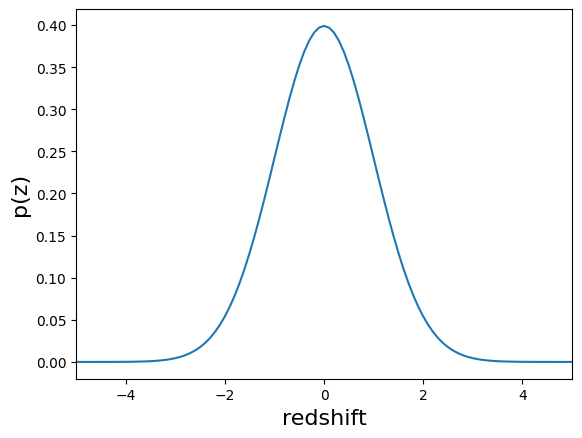

In [3]:
loc1 = np.array([[0]])
scale1 = np.array([[1]])
norm_dist1 = qp.stats.norm(loc=loc1, scale=scale1)
fig, axes = qp.plotting.plot_native(norm_dist1, xlim=(-5., 5.))

In [4]:
xvals = np.linspace(-5, 5, 11)

[0.01       0.17333333 0.33666667 0.5        0.66333333 0.82666667
 0.99      ]
The input and output shapes are: (11,) (1, 11)
piecewise_linear
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
[[0.         0.         0.         0.01052214 0.02219038 0.03457497
  0.02219038 0.01052214 0.         0.         0.        ]]
[[0.         0.         0.         0.04264649 0.15912777 0.5
  0.84087223 0.95735351 1.         1.         1.        ]]


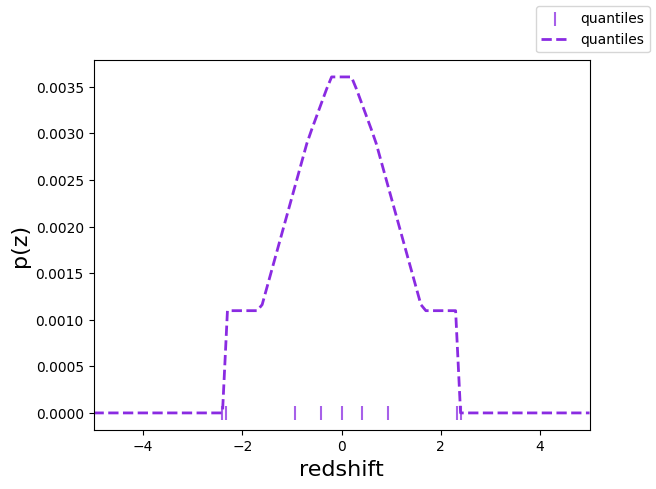

In [5]:
# Define the quantile values to compute the locations for
quants = np.linspace(0.01, 0.99, 7)
# quants = np.array([0.01, 0.30, 0.70, 0.99])
print(quants)
# Compute the corresponding locations
locs = norm_dist1.ppf(quants)
# Construct the distribution using the quantile value and locations
quant_dist = qp.quant(quants=quants, locs=locs)    # quant = quant_gen.create
quant_vals = quant_dist.pdf(xvals)
print("The input and output shapes are:", xvals.shape, quant_vals.shape)
# Construct a single PDF for plotting
quant_dist1 = qp.quant(quants=np.atleast_1d(quants), locs=np.atleast_2d(locs[0]))
print(quant_dist1.dist.pdf_constructor_name)
quant_dist1.dist.pdf_constructor_name='piecewise_linear'
# quant_dist1.dist.pdf_constructor_name='piecewise_constant'
# quant_dist1.dist.pdf_constructor_name='cdf_spline_derivative'
# quant_dist1.dist.pdf_constructor_name='dual_spline_average'
print(xvals)
print(quant_dist1.pdf(xvals))
print(quant_dist1.cdf(xvals))
fig, axes = qp.plotting.plot_native(quant_dist1, xlim=(-5., 5.), label="quantiles")
leg = fig.legend()

visually inspect data with plotting (look at tails, are there features in the distribution, general shape, symmetry)

In [8]:
data = np.loadtxt("../pzdata.csv",delimiter=",")
print(data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


The input and output shapes are: (299,) (1000, 299)


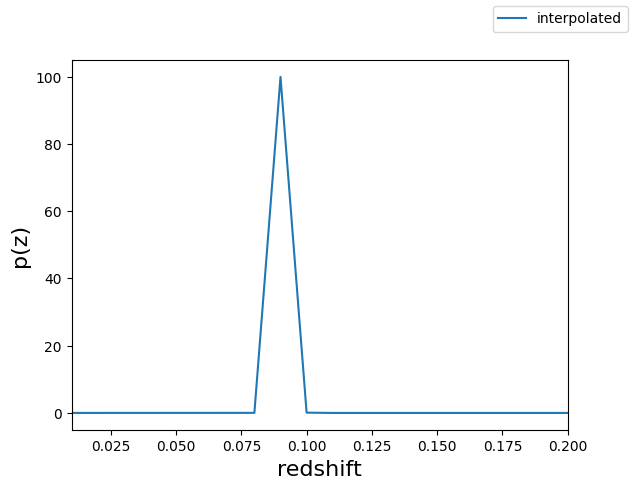

In [10]:
zgrid = np.arange(0.01, 3, 0.01)
interp_dist = qp.interp(xvals=zgrid, yvals=data)
interp_vals = interp_dist.pdf(zgrid)
print("The input and output shapes are:", zgrid.shape, interp_vals.shape)
# Construct a single PDF for plotting
interp_dist1 = qp.interp(xvals=zgrid, yvals=np.atleast_2d(data[0]))
fig, axes = qp.plotting.plot_native(interp_dist1, xlim=(0.01, 0.2), label="interpolated")
leg = fig.legend()

change 7 to diff numbers for
quants = np.linspace(0.01, 0.99, 7)

try specifying values instead of using linspace

evaluate metrics other than just visually inspect (kld, rms)